# Harris Corner Detection, Chessboard

### Import resources and display image

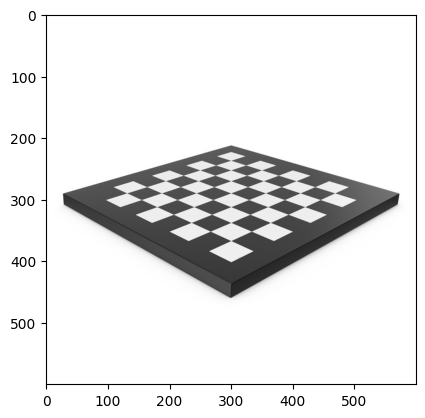

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read the image
image = cv2.imread('images/skewed_chessboard.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change the color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect Corner

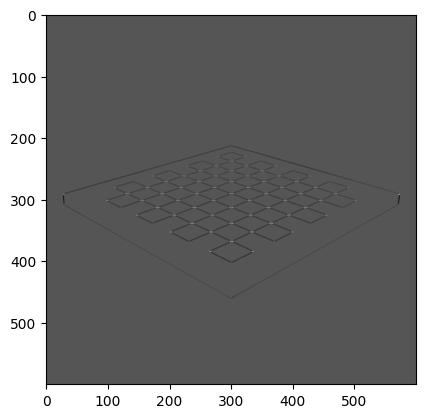

In [6]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Convert to float type
gray = np.float32(gray) # these floating point values will be used by Harris corner detector

# Detect Corner
dst = cv2.cornerHarris(gray, 2, 3, 0.04)
# arguments are as follows:
# 1st is the gray scale float value
# 2nd is the size of the neighborhood to look at to help identify potential corners. 2 means a 2x2 pixel square
# 3rd is the size of sobel operator which is set to 3 for typical 3x3 sobel operator
# 4th is the constant value to identify which points are considered corner values. Value of 0.04 is typical , a slightly lower value will result in more corners detected
# this above produces an image with corner marked as light points and non-corners as darker pixels


plt.imshow(dst, cmap='gray')

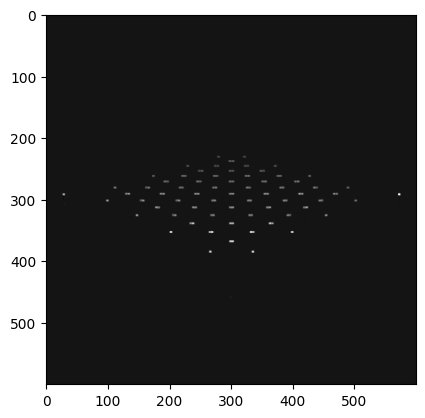

In [7]:
# Since corners are not visible so we need to perform dilation

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap='gray')

### Select and display strong corners

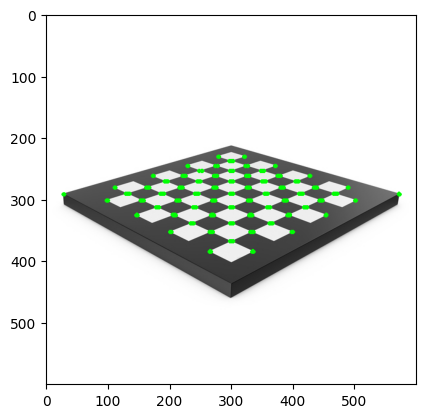

In [14]:
# Define a threshold for extracting strong corners
# This value may vary depending on the image

thresh = 0.17*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

for j in range(dst.shape[0]):
    for i in range(dst.shape[1]):
        if (dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle(corner_image, (i,j), 2, (0, 255, 2), 1) # small green circle


plt.imshow(corner_image)